# Behavior Cloning Training Model




Overall approach to behavior cloning

* Load training data: Reads file names and returns a list of batches
 * Read CSV file
 * Read X_train_files, y_train_angle
 * Convert into X_train and y_train dataset
 * Visualize random training data
 * Analyze training data

* Preprocess training data : Takes a batch and returns a preprocessed batch
 * Shuffling
 * Convert to grayscale / normalize
 * Split training data
 * Augment data

## Loading training data

In [1]:
#imports
from PIL import Image
import numpy as np
import os
import random

#constants
PATH_OF_IMAGES = './data/simulator/IMG'
PATH_OF_CSV = './data/simulator/driving_log.csv'
IMAGE_TYPE = 'center'


In [32]:
#load csv file
import csv

# returns a tuple of X_train_image_filenames, y_train_angle
def readCsv():
    csvData = np.array(list(csv.reader(open(PATH_OF_CSV))))
    print('Shape of CSV file {0}'.format(csvData.shape))
    X_train_image_filenames = csvData[:,0]
    y_train_angle = (csvData[:,3]).astype(np.float32)
    return X_train_image_filenames, y_train_angle

X_train_image_filenames, y_train = readCsv()

Shape of CSV file (323, 7)


In [33]:
#load training data and images
def loadImages(type):
    files = os.listdir(PATH_OF_IMAGES)
    files = list(filter(lambda k: type in k, files))
    print('{0} {1} images available in training data'.format(len(files), type))
    return files


#takes a list of image filenames 
def loadAllImages(files):
    image_array = []
    for image in files:
        img = Image.open(image)
        np_img = np.array(img, dtype=np.float32)
        image_array.append(np_img)
    image_array = np.array(image_array)
    assert (random.choice(image_array).shape == (160,320,3))
    return image_array

X_train = loadAllImages(X_train_image_filenames)
print(X_train.shape)

(323, 160, 320, 3)


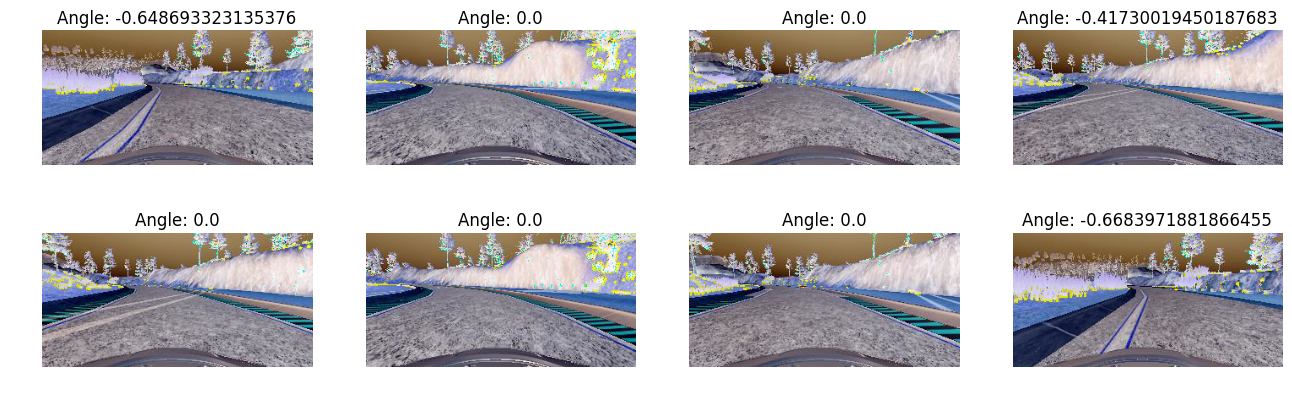

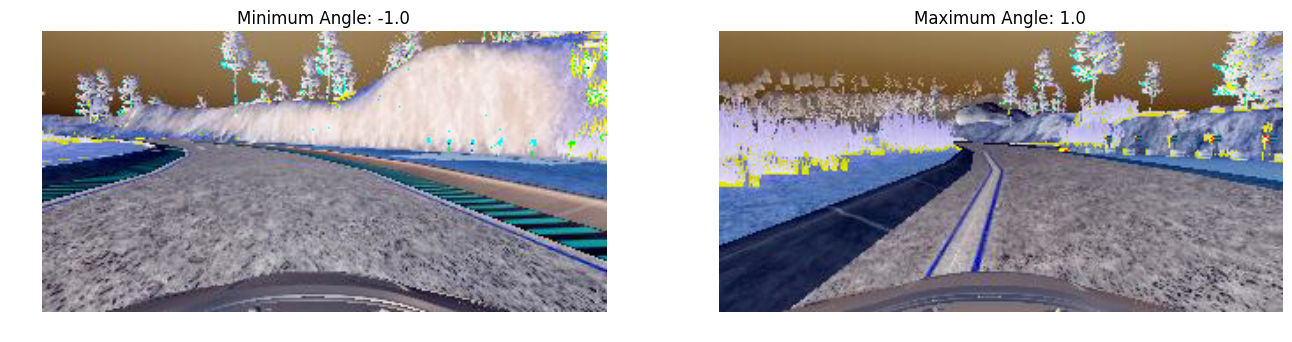

In [49]:
#visual a random sample of training data
#visualization strategy
#  - 4 random samples
#  - 3 samples - lowest steering angle, highest steering angle and zero steering angle
#  - Histogram of y

import matplotlib.pyplot as plt
%matplotlib inline

def plotRandomImage():
    X_random_16 = np.random.choice(len(X_train), 8)
    plt.figure(figsize=(16,10))
    for ii,idx in enumerate(X_random_16):
        plt.subplot(4,4, ii+1)
        plt.axis('off')
        plt.title('Angle: {}'.format(y_train[idx]))
        plt.imshow(X_train[idx])

#create histogram of y
#display min,max steering and image
def plotMinMax():
    y_train_min = np.argmin(y_train)
    y_train_max = np.argmax(y_train)
    plt.figure(figsize=(16,8))
    plt.subplot(1,2, 1)
    plt.axis('off')
    plt.imshow(X_train[y_train_min])
    plt.title('Minimum Angle: {}'.format(y_train[y_train_min]))
    plt.subplot(1,2, 2)
    plt.axis('off')
    plt.title('Maximum Angle: {}'.format(y_train[y_train_max]))
    plt.imshow(X_train[y_train_max])

plotRandomImage()
plotMinMax()


## Preprocess training data

In [50]:
#Shuffling training data
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

In [54]:
#normalize the data between range -0.5 to 0.5
def normalize_between_plus_min_05(image_data):
    image_data = image_data.astype('float32')
    image_data = image_data / 255 - 0.5
    return image_data

def normalize_grayscale(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    a = 0.1
    b = 0.9
    grayscale_min = 0
    grayscale_max = 255
    return a + ( ( (image_data - grayscale_min)*(b - a) )/( grayscale_max - grayscale_min ) )

X_train = normalize_grayscale(X_train)

In [57]:
#Split the data into training/validation/testing sets here.

from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(
    X_train, y_train, test_size=0.20, random_state=42)

print('Shape of training images {}', X_train.shape)
print('Shape of validation images {}', X_validation.shape)

Shape of training images {} (164, 160, 320, 3)
Shape of validation images {} (42, 160, 320, 3)
